In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

In [3]:
DATE_START = '2020-03-03'
TRAIN_POINTS = 50
COUNTRY = 'RUS'
PATH = 'owid-covid-data.csv'

CONST_MULT = 1000
FIRST_MAY = '2020-05-01'
FIRST_JUNE = '2020-06-01'
FIRST_SEMP = '2020-09-01'

COUNT_SAMPLE = 500

# Чтение данных и извлечение целевой переменной для обучающей и тестовой выборки

In [4]:
df = pd.read_csv(PATH)
df = df[df.iso_code == COUNTRY]

In [5]:
df.head(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
121358,RUS,Europe,Russia,2020-01-31,2.0,2.0,NaN,NaN,NaN,NaN,...,23.4,58.3,NaN,8.05,72.58,0.824,-5538.0,-3.33,-3.33,-37.954378
121359,RUS,Europe,Russia,2020-02-01,2.0,0.0,NaN,NaN,NaN,NaN,...,23.4,58.3,NaN,8.05,72.58,0.824,NaN,NaN,NaN,NaN
121360,RUS,Europe,Russia,2020-02-02,2.0,0.0,NaN,NaN,NaN,NaN,...,23.4,58.3,NaN,8.05,72.58,0.824,NaN,NaN,NaN,NaN
121361,RUS,Europe,Russia,2020-02-03,2.0,0.0,NaN,NaN,NaN,NaN,...,23.4,58.3,NaN,8.05,72.58,0.824,NaN,NaN,NaN,NaN
121362,RUS,Europe,Russia,2020-02-04,2.0,0.0,NaN,NaN,NaN,NaN,...,23.4,58.3,NaN,8.05,72.58,0.824,NaN,NaN,NaN,NaN
121363,RUS,Europe,Russia,2020-02-05,2.0,0.0,0.286,NaN,NaN,NaN,...,23.4,58.3,NaN,8.05,72.58,0.824,NaN,NaN,NaN,NaN
121364,RUS,Europe,Russia,2020-02-06,2.0,0.0,0.286,NaN,NaN,NaN,...,23.4,58.3,NaN,8.05,72.58,0.824,NaN,NaN,NaN,NaN
121365,RUS,Europe,Russia,2020-02-07,2.0,0.0,0.000,NaN,NaN,NaN,...,23.4,58.3,NaN,8.05,72.58,0.824,NaN,NaN,NaN,NaN
121366,RUS,Europe,Russia,2020-02-08,2.0,0.0,0.000,NaN,NaN,NaN,...,23.4,58.3,NaN,8.05,72.58,0.824,NaN,NaN,NaN,NaN
121367,RUS,Europe,Russia,2020-02-09,2.0,0.0,0.000,NaN,NaN,NaN,...,23.4,58.3,NaN,8.05,72.58,0.824,NaN,NaN,NaN,NaN


In [6]:
df_rus = df[df.date >= DATE_START].reset_index()

In [7]:
df_train = df_rus.head(TRAIN_POINTS)
df_test = df_rus.tail(-TRAIN_POINTS)

In [8]:
def get_day_index(df, date):
    return df[df.date == date].index[0] - TRAIN_POINTS + 1

In [9]:
first_may_index = get_day_index(df_test, FIRST_MAY)
first_june_index = get_day_index(df_test, FIRST_JUNE)
first_semp_index = get_day_index(df_test, FIRST_SEMP)

In [10]:
def get_data(dataframe):
    x = np.array(dataframe.index)
    y_total_cases = np.array(dataframe.total_cases).astype(int)
    dataframe.loc[(dataframe.new_cases == 0), 'new_cases'] = 1
    y_new_cases = np.array(df_train.new_cases)
    return x, y_total_cases, y_new_cases

In [12]:
x_train, y_total_cases_train, y_new_cases_train = get_data(df_train)
x_test, y_total_cases_test, y_new_cases_test = get_data(df_test)

Построим графики зависимости новых случаев заболевания по дням и суммарное число

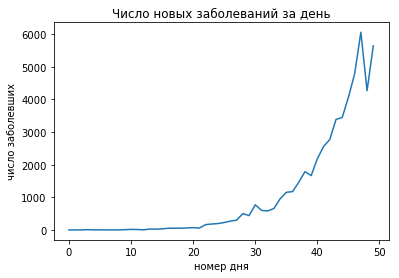

In [13]:
plt.plot(x_train, y_new_cases_train);
plt.title('Число новых заболеваний за день');
plt.xlabel('номер дня');
plt.ylabel('число заболевших');

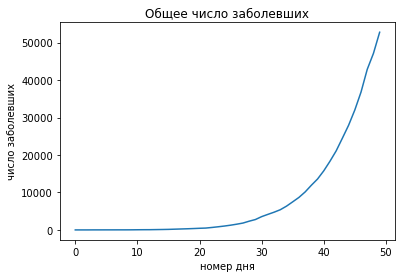

In [14]:
plt.plot(x_train, y_total_cases_train);
plt.title('Общее число заболевших');
plt.xlabel('номер дня');
plt.ylabel('число заболевших');

# Приближение экспонентой

## Обучаем линейную регрессию

$\ln y_{total\text{ } cases} = w_0 + w_1 \cdot x$

In [15]:
log_y = np.log(y_total_cases_train)

In [16]:
linear_reg = LinearRegression()
linear_reg.fit(x_train.reshape(-1, 1), log_y);

In [17]:
pred = linear_reg.predict(x_train.reshape(-1, 1))

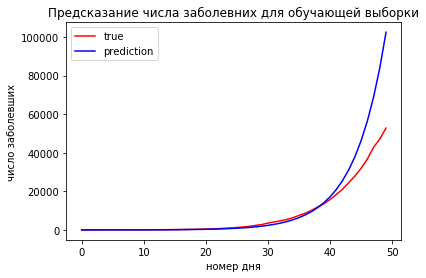

In [18]:
plt.plot(x_train, y_total_cases_train, label='true', color='r');
plt.plot(x_train, np.exp(pred), label='prediction', color='b');
plt.legend();
plt.title('Предсказание числа заболевних для обучающей выборки');
plt.xlabel('номер дня');
plt.ylabel('число заболевших');

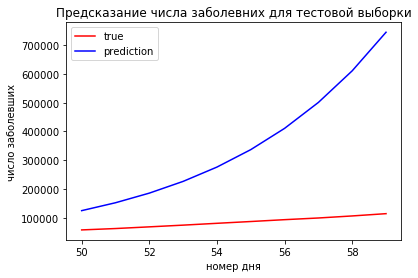

In [19]:
end = 10
plt.plot(x_test[:end], y_total_cases_test[:end], label='true', color='r');
plt.plot(x_test[:end], np.exp(linear_reg.predict(x_test.reshape(-1, 1)))[:end], label='prediction', color='b');
plt.legend();
plt.title('Предсказание числа заболевних для тестовой выборки');
plt.xlabel('номер дня');
plt.ylabel('число заболевших');

Большое расхождение на тесте уже с самого начала временного ряда, дальше только хуже. Данная модель не годится для оценки числа заболевших

## Апостериорное распределение параметров

In [20]:
sigma_noise = np.std(log_y - pred)
sigma_noise

0.3490422059635658

In [21]:
cur_mu, cur_sigma = np.array([0, 0]), CONST_MULT * np.array([[1, 0], [0, 1]])

In [22]:
def add_bias(x):
    return np.vstack([np.ones((1, len(x.T))), x]).T

In [23]:
def bayesian_update(mu, sigma, x, y, sigma_noise):
    x_matrix = add_bias(x)
    sigma_n = np.linalg.inv(np.linalg.inv(sigma)+ (1 / (sigma_noise ** 2)) * np.matmul(np.transpose(x_matrix), x_matrix) )
    mu_n = np.matmul(sigma_n, np.matmul(np.linalg.inv(sigma), np.transpose(mu)) + (1 / (sigma_noise ** 2)) * np.matmul(np.transpose(x_matrix), y ) )
    return mu_n, sigma_n

In [24]:
mu_n, sigma_n = bayesian_update(cur_mu, cur_sigma, x_train, log_y, sigma_noise)

print('mu: ', mu_n)
print()
print('sigma:\n', sigma_n)

mu:  [1.82071998 0.19829143]

sigma:
 [[ 9.45968745e-03 -2.86657194e-04]
 [-2.86657194e-04  1.17003222e-05]]


In [25]:
def sample_w(mu, sigma, x, n=COUNT_SAMPLE):
    # Посэмплируем
    x_matrix = add_bias(x)
    w = np.random.multivariate_normal(mu, sigma, n)
    return np.matmul(w, x_matrix.T)

In [26]:
sample_pred_train = np.exp(sample_w(mu_n, sigma_n, x_train))

In [27]:
def plot_sample_result(x, sample_pred, end=None):
    if end is None:
        end = sample_pred.shape[1]
    for pred in sample_pred:
        plt.plot(x[:end], pred[:end], 'k-', lw=.4)

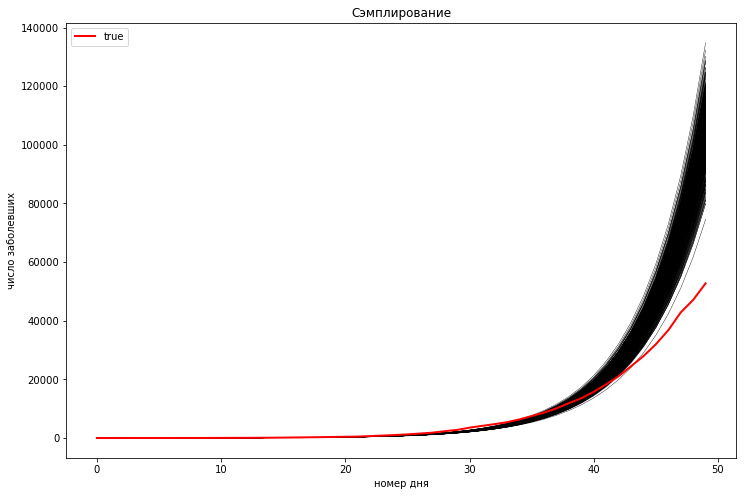

In [28]:
plt.figure(figsize=(12,8))
plot_sample_result(x_train, sample_pred_train)
plt.plot(x_train, y_total_cases_train, label='true', color='r', lw=2);
plt.legend();
plt.xlabel('номер дня');
plt.ylabel('число заболевших');
plt.title('Сэмплирование');

для теста

In [29]:
def predict_test(x, mu):
    x_matrix = add_bias(x)
    return np.matmul(mu, x_matrix.T)

In [30]:
sample_pred_test = np.exp(sample_w(mu_n, sigma_n, x_test))

pred_test = np.exp(predict_test(x_test, mu_n))

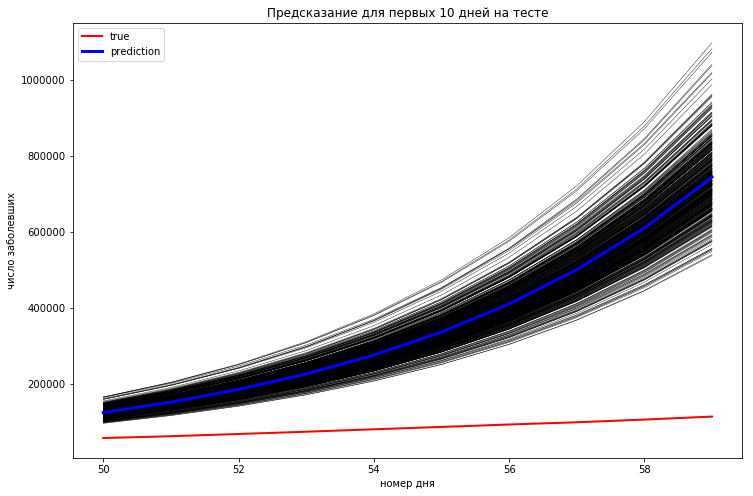

In [31]:
plt.figure(figsize=(12,8))
end = 10
plot_sample_result(x_test, sample_pred_test, end)
plt.plot(x_test[:end], y_total_cases_test[:end], label='true', color='r', lw=2);
plt.plot(x_test[:end], pred_test[:end], label='prediction', color='b', lw=3);
plt.legend();
plt.title(f'Предсказание для первых {end} дней на тесте');
plt.xlabel('номер дня');
plt.ylabel('число заболевших');

In [32]:
print(f'К 1 мая заболеет {pred_test[first_may_index] / 1e3 :.3f} тыс человек')
print(f'К 1 июня заболеет {pred_test[first_june_index] / 1e6 :.3f} млн человек')
print(f'К 1 сентября заболеет {pred_test[first_semp_index] / 1e9 :.3f} млрд человек')

К 1 мая заболеет 907.280 тыс человек
К 1 июня заболеет 423.998 млн человек
К 1 сентября заболеет 35490875.409 млрд человек


In [33]:
may_distribution = sample_pred_test[:, first_may_index].astype(int)
june_distribution = sample_pred_test[:, first_june_index].astype(int)
semp_distribution = sample_pred_test[:, first_semp_index].astype(int)

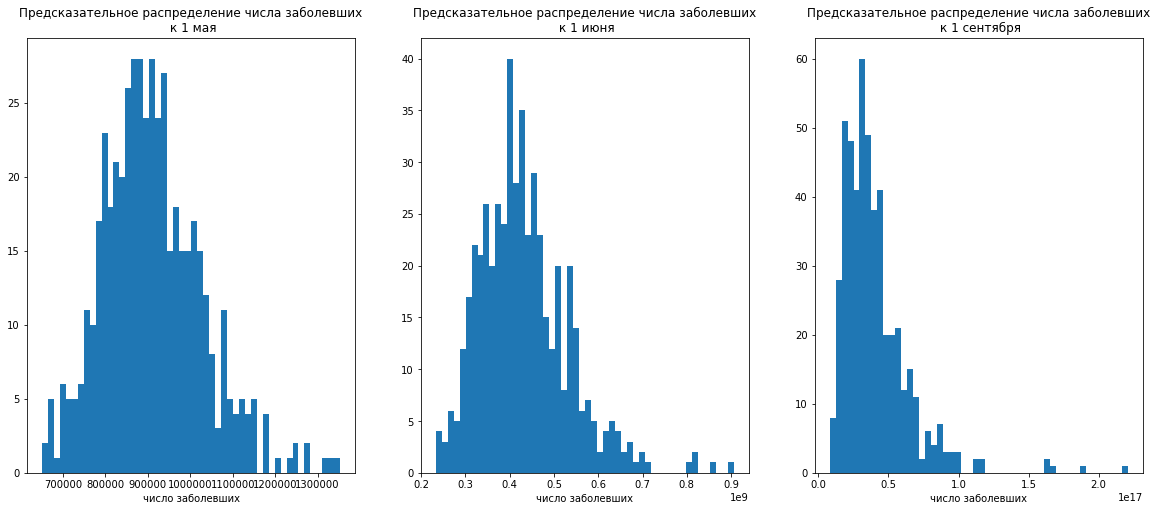

In [34]:
plt.figure(figsize=(20,8))

plt.subplot(1,3,1)
plt.hist(may_distribution, bins=50);
plt.title(f"Предсказательное распределение числа заболевших\n к 1 мая");
plt.xlabel('число заболевших');

plt.subplot(1,3,2)
plt.hist(june_distribution, bins=50);
plt.title(f"Предсказательное распределение числа заболевших\n к 1 июня");
plt.xlabel('число заболевших');

plt.subplot(1,3,3)
plt.hist(semp_distribution, bins=50);
plt.title(f"Предсказательное распределение числа заболевших\n к 1 сентября");
plt.xlabel('число заболевших');

Получаем весьма нереалистичные предсказания. Прогноз заболевших к 1 сентября в десятки раз превышает общее население планеты.

# Приближение сигмоидой

$y_{total\text{ } cases} = \int\limits^x_{-\infty} e^{w_0 + w_1 \cdot t + w_2 \cdot t^2} dt$

$\ln\Delta y_{total\text{ } cases} = w_0 + w_1 \cdot x + w_2 \cdot x^2$

Будем считать, что
$\Delta y_{total\text{ } cases} = y_{new\text{ } cases}$.

Тогда: $\ln y_{new\text{ } cases} = w_0 + w_1 \cdot x + w_2 \cdot x^2$

$y_{new\text{ } cases} = e^{w_0 + w_1 \cdot x + w_2 \cdot x^2}$

In [35]:
def new_cases_to_total_cases(preds):
    '''Переход от прироста к общему числу заражений'''
    return 2 + np.cumsum(np.exp(preds), axis=-1)    # сумма накапливается в строке

In [36]:
x_new_train = np.vstack([x_train, x_train ** 2])
x_new_test = np.vstack([x_test, x_test ** 2])

log_y_new_cases_train = np.log(y_new_cases_train)
log_y_new_cases_test = np.log(y_new_cases_test)

In [37]:
linear_reg = LinearRegression()
linear_reg.fit(x_new_train.T, log_y_new_cases_train);

In [38]:
pred = linear_reg.predict(x_new_train.T)

In [39]:
pred_test = linear_reg.predict(x_new_test.T)

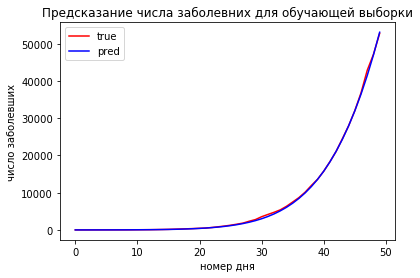

In [40]:
plt.plot(x_train, y_total_cases_train, label='true', color='r');
plt.plot(x_train, new_cases_to_total_cases(pred), label='pred', color='b');
plt.legend();
plt.title('Предсказание числа заболевних для обучающей выборки');
plt.xlabel('номер дня');
plt.ylabel('число заболевших');

# Апостериорное распределение параметров

In [41]:
sigma_noise = np.std(log_y_new_cases_train - pred)
sigma_noise

0.48916954245951955

In [42]:
cur_mu, cur_sigma = np.array([0, 0, 0]), CONST_MULT * np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])

In [43]:
mu_n, sigma_n = bayesian_update(cur_mu, cur_sigma, x_new_train, log_y_new_cases_train, sigma_noise)

print('mu: ', mu_n)
print()
print('sigma:\n', sigma_n)

mu:  [-0.39657373  0.27562146 -0.00182977]

sigma:
 [[ 3.98001444e-02 -3.21562616e-03  5.41351180e-05]
 [-3.21562616e-03  3.54561191e-04 -6.76698532e-06]
 [ 5.41351180e-05 -6.76698532e-06  1.38102366e-07]]


In [44]:
sample_pred_train = new_cases_to_total_cases(sample_w(mu_n, sigma_n, x_new_train, 100))

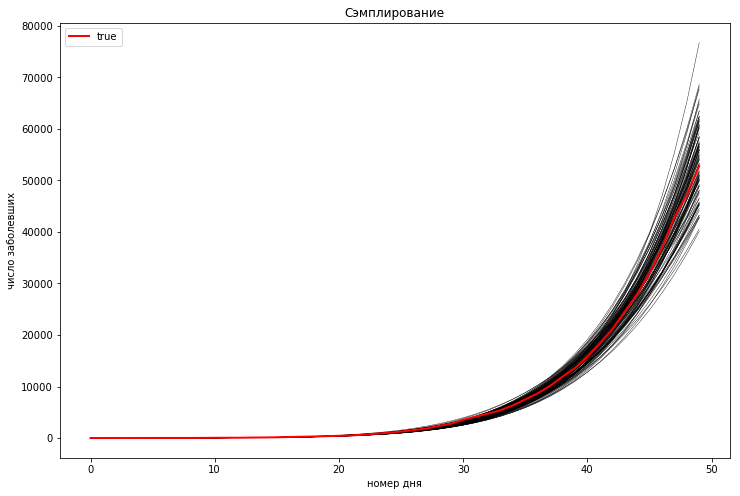

In [45]:
plt.figure(figsize=(12,8))
plot_sample_result(x_train, sample_pred_train)
plt.plot(x_train, y_total_cases_train, label='true', color='r', lw=2);
plt.legend();
plt.xlabel('номер дня');
plt.ylabel('число заболевших');
plt.title('Сэмплирование');

In [46]:
sample_pred_test = new_cases_to_total_cases(sample_w(mu_n, sigma_n, x_new_test))

pred_test = new_cases_to_total_cases(predict_test(x_new_test, mu_n))

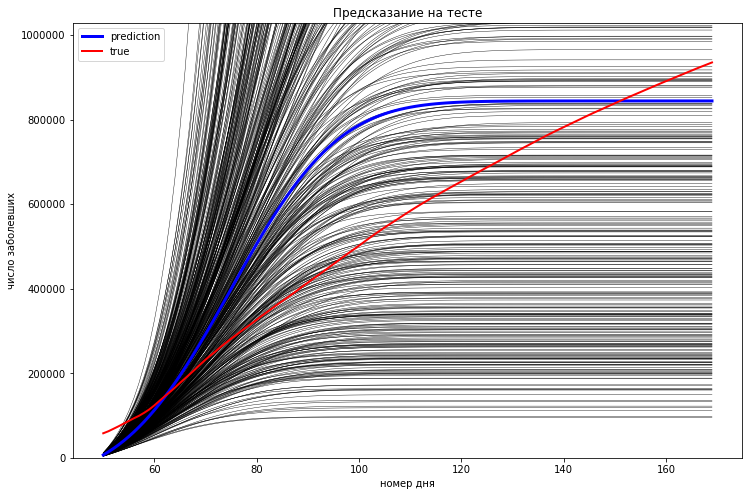

In [47]:
plt.figure(figsize=(12,8))
end = 120

plot_sample_result(x_test, sample_pred_test, end)
plt.plot(x_test[:end], pred_test[:end], label='prediction', color='b', lw=3);
plt.plot(x_test[:end], y_total_cases_test[:end], label='true', color='r', lw=2);
plt.legend();

plt.ylim(0, max(y_total_cases_test[:end]) * 1.1);
plt.title(f'Предсказание на тесте');
plt.xlabel('номер дня');
plt.ylabel('число заболевших');


In [48]:
last_point_distribution = sample_pred_test[:, -1].astype(int)

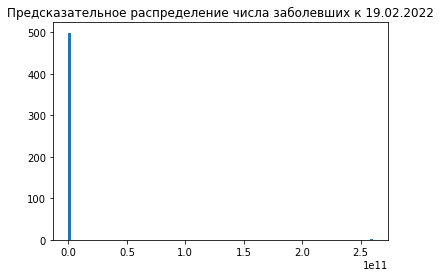

In [49]:
plt.hist(last_point_distribution, bins=100);
plt.title(f"Предсказательное распределение числа заболевших к 19.02.2022");

Уберем выбросы для большей наглядности

In [50]:
x_min = np.quantile(last_point_distribution, 0.05)
x_max = np.quantile(last_point_distribution, 0.95)

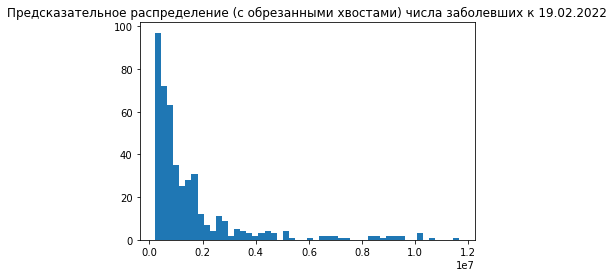

In [51]:
plt.hist(last_point_distribution, bins=50, range=(x_min, x_max));
plt.title(f"Предсказательное распределение (с обрезанными хвостами) числа заболевших к 19.02.2022");

In [52]:
print(f'Предсказание числа заболевших к 19.02.2022:')
print(f'В лучшем случае: {np.quantile(last_point_distribution, 0.1) / 1e3 :.3f} тыс чел')
print(f'В среднем случае: {np.quantile(last_point_distribution, 0.5)  / 1e3 :.3f} тыс чел')
print(f'В худшем случае: {np.quantile(last_point_distribution, 0.9) / 1e6 :.3f} млн чел')
print()
print(f'На самом деле: {y_total_cases_test[-1]  / 1e6 :.3f} млн чел')

Предсказание числа заболевших к 19.02.2022:
В лучшем случае: 262.542 тыс чел
В среднем случае: 877.772 тыс чел
В худшем случае: 5.319 млн чел

На самом деле: 14.979 млн чел


Видим, что даже пессимистичный прогноз занижает оценку примерно в 3 раза. 

# Выводы

1. Моделирование экспонентой плохо описывает данные и не согласуется со здравым смыслом (при пандемии когда-то наступит точка насыщения, а у экспоненты ее нет)  
2. Моделирование сигмоидой описывает данные лучше, но все равно не идеально, и довольно сильно занижает прогноз
3. Как и следовало ожидать, сигмоида хорошо предсказывает там, где есть точки обучающей выборки, но чем дальше от известных значений, тем больше дисперсия и неуверенность в предсказаниях.